# FIFA VALUE OF PLAYER PREDICTION 

18 May 2022

                                                                                    Team Members 
                                                                                     * Siddhant Gupta (50441839)
                                                                                     * Kishore Kumar (50442203)
                                                                                     * Vineeth ()
                                                                                     * Anjali . T (50441491)   

Our project considered two years data of fifa players , fifa 2018 , fifa 2020 . We intended to predict the value of the player based on previous data . To establish this we used two models . Namely 
- linear regression 
- k fold method 

We then plotted the predicted values correspoinding to the actual value to understand the accuracy of our models . 


We followed the below listed steps to create our model
- loading the data using pandas 
- understanding the data and columns 
- normalizing the data into understandable data bases 
- visualising the data 
- understanding the dependencies for value
- pre processing data , removing na's , clearing less useful features 
- dividing the table into training and testing data set to understand the accuracy of our system 
- constructing the models 
- visualising the models 
- fitting in 2020 data set 

### Insights 

* More the overall more the value.
* less the age more the value.
* more international rep more the value.
* more the potential more the value
* higher wage = higer value 
* as the age goes above 30 value starts to decrease (exception if you are Messi aur Ronaldo.
* Player with skill moves 3 and above usually get higher value . 
* Attackers are paid more than midfielders , defenders and Goalkeepers .
* Longer contract higher value .



In [1]:
### loading all necesary libraries 
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns
import numpy as np
import matplotlib as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading data using pandas

In [2]:
df = pd.read_csv('players_18.csv')

## Understanding the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(11), object(77)
memory usage: 14.0+ MB


In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,59+4,59+4,59+4,65+4


In [5]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [8]:
df['height_cm'].describe()

count    17592.000000
mean       181.262335
std          6.686939
min        155.000000
25%        177.000000
50%        181.000000
75%        186.000000
max        205.000000
Name: height_cm, dtype: float64

In [13]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(155, 206, 10)]

df['Height_range'] = pd.cut(df.height_cm, range(155, 220, 10), right=False, labels=labels)

In [14]:
df['Height_range'].value_counts()

175 - 186    9050
185 - 196    5493
165 - 176    2634
195 - 206     345
155 - 166      69
205 - 216       1
Name: Height_range, dtype: int64

<BarContainer object of 17592 artists>

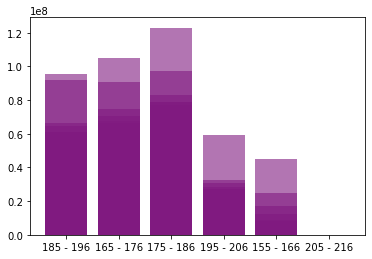

In [15]:
plt.bar(df.Height_range, df.value_eur, color = (0.5,0.1,0.5,0.6))
plt.show()

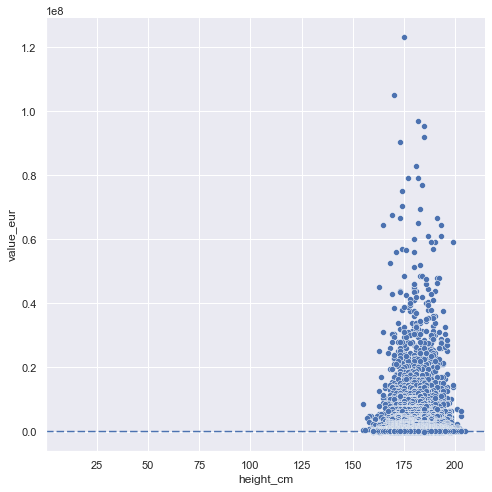

In [16]:
sns.set(rc = {'figure.figsize':(10,8)})  
g = sns.relplot(data=df, x="height_cm", y="value_eur",height = 7)
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

## Visualising the data

### undertsanding the data based on the index 

In [6]:
### AGE

<Figure size 1152x2160 with 0 Axes>

<Figure size 1152x2160 with 0 Axes>

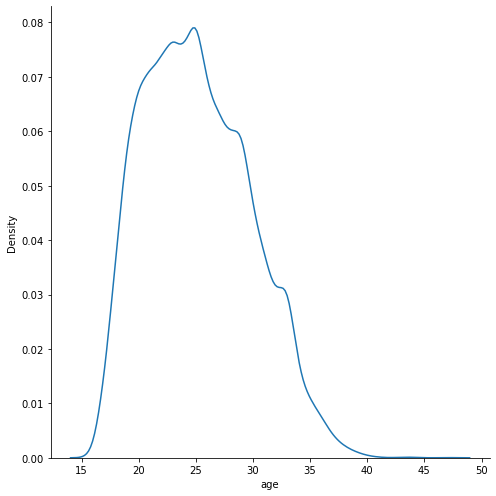

In [7]:

plt.figure(figsize=(16, 30))
sns.displot(data=df, x="age",   kind="kde",height = 7)

In [8]:
### max players of the age grop of 20 - 28.

Text(0.5, 0, 'Overall and Age')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price vs Overall and Age')

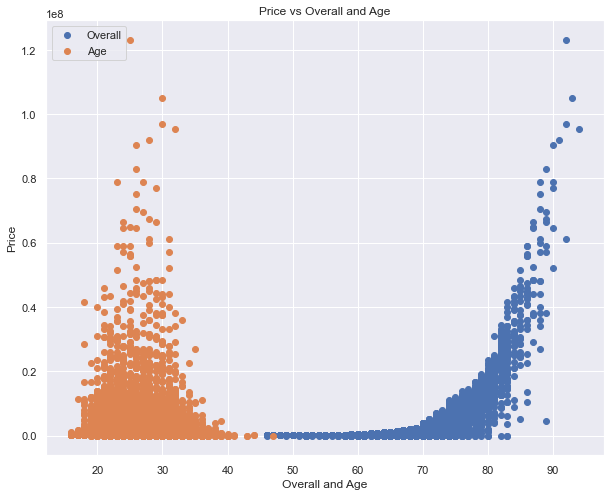

In [18]:
plt.scatter(df['overall'], df['value_eur'], label='Overall')
plt.scatter(df['age'], df['value_eur'], label='Age')

# Add axis labels and title
plt.xlabel('Overall and Age')
plt.ylabel('Price')
plt.title('Price vs Overall and Age')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### AGE VS VALUE

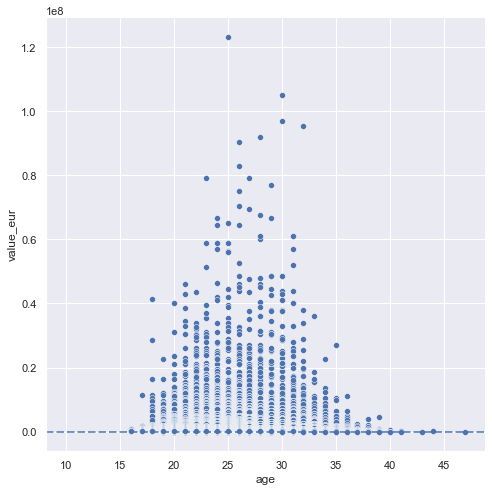

In [9]:
sns.set(rc = {'figure.figsize':(10,8)})  
g = sns.relplot(data=df, x="age", y="value_eur",height = 7)
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

In [10]:
### We can that there is a steep decline of value after or around 30 . 

##### Overall

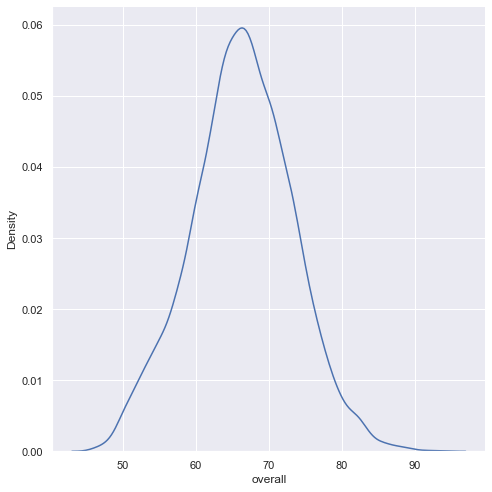

In [11]:

sns.displot(data=df, x="overall",   kind="kde",height = 7)

#### Overall VS Value of a Player

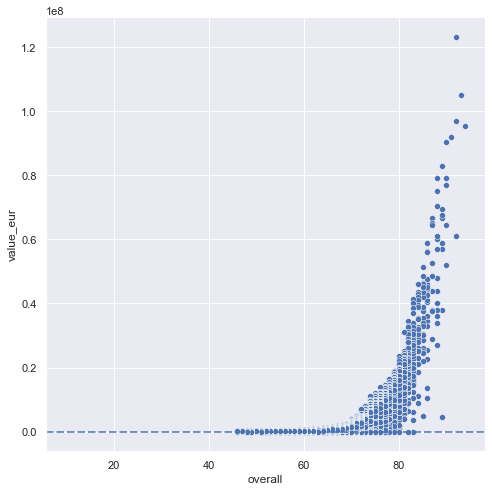

In [12]:
 

g = sns.relplot(data=df, x="overall", y="value_eur"  ,height = 7  )

g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))



In [13]:
# AS potential increases value increases

#### Potential 

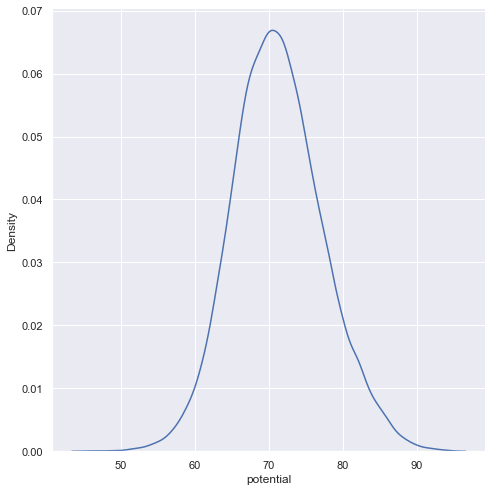

In [14]:
sns.displot(data=df, x="potential",   kind="kde",height = 7)

#### Potential vs Value

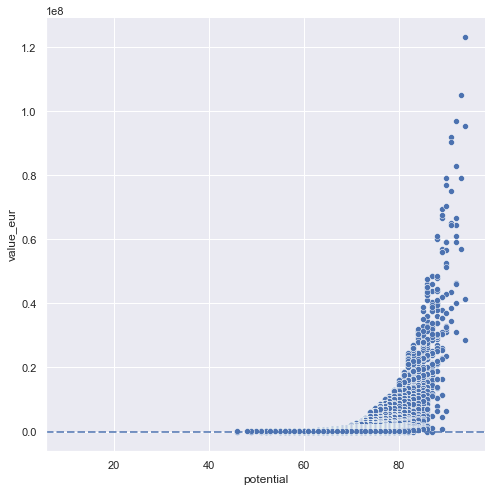

In [15]:
g = sns.relplot(data=df, x="potential", y="value_eur" ,height = 7  )

g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

### High potential = High Value

#### WAGE

(0.0, 200000.0)

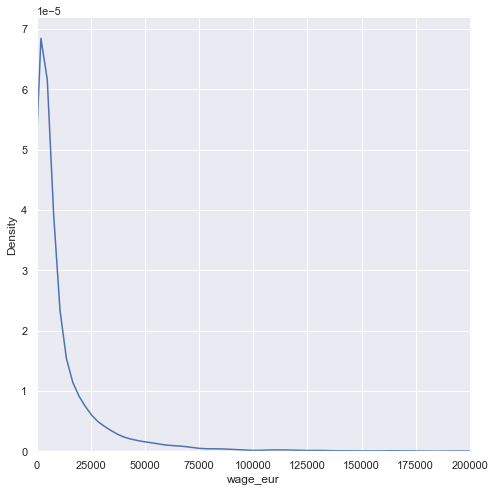

In [16]:
import matplotlib.pyplot as plt
scatter = sns.displot(data=df, x="wage_eur",   kind="kde",height = 7 ,)
plt.xlim(0, 200000)
plt.show()

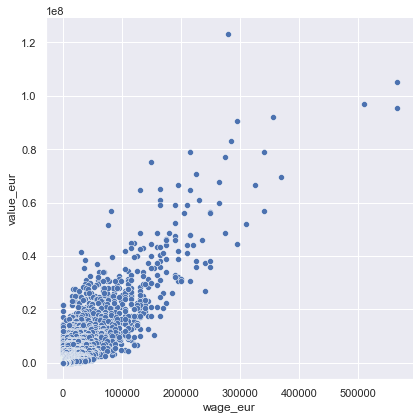

In [17]:
ax = sns.relplot(data=df, x="wage_eur", y="value_eur" ,height = 6  ,)

g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

In [18]:
### Directly praportional to wage.

 #### International_reputation

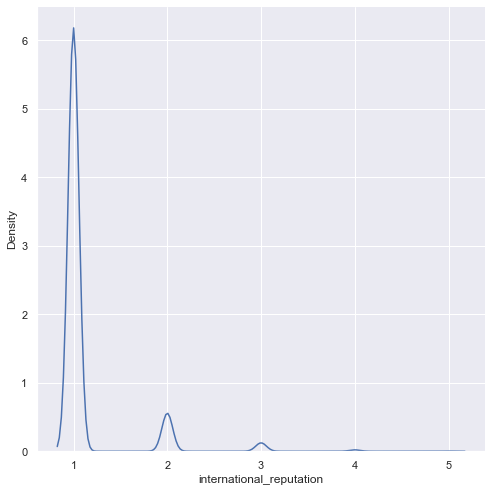

In [19]:
sns.displot(data=df, x="international_reputation",   kind="kde",height = 7 ,)

In [20]:
#### Overall VS Value of a Player VS International_reputation

/Users/siddhantgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


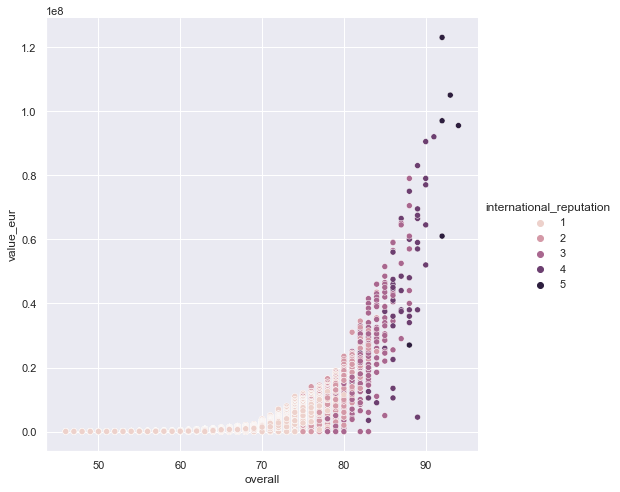

In [21]:
ax = sns.relplot(data=df, x="overall", y="value_eur"  ,hue="international_reputation",height = 7  ,ax=ax)

g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))



In [22]:
# Higher International reputation with high overall means higher value of player 

In [ ]:
plt.scatter(df['overall'], df['price'], label='Overall')
plt.scatter(df['age'], df['price'], label='Age')

# Add axis labels and title
plt.xlabel('Overall and Age')
plt.ylabel('Price')
plt.title('Price vs Overall and Age')

# Add legend
plt.legend()

# Show the plot
plt.show()

 ### Player_positions

In [23]:
df['player_positions'].unique()

array(['LW, ST', 'RW', 'LW', 'GK', 'ST', 'CB', 'CM, CDM', 'CAM, CM, RM',
       'LM, ST, LW, RM', 'CAM, ST', 'ST, RW, LW', 'CM, CAM, CDM',
       'RM, RW', 'CAM, RW', 'CAM, RM, LM', 'CDM, CM', 'CAM, CM, LM', 'CM',
       'LB', 'CM, CAM, RM, LM', 'LW, CAM', 'LB, LM', 'LB, CB, CM',
       'LM, LW', 'CM, CDM, CAM', 'CF, LW, ST', 'CB, CDM', 'CM, CAM',
       'LM, ST, LW', 'CF, RW, CAM, ST', 'LM, RM', 'CDM', 'CB, RB, LB',
       'RW, LW', 'RM, RW, LM', 'CAM, RM, LM, LW', 'RM', 'CAM, CF, LM',
       'CM, RM, LM', 'LW, CAM, LM', 'RB', 'CAM, RM', 'RW, RM, CAM',
       'LM, CAM', 'RW, LW, CAM', 'LM', 'ST, CF, CAM', 'CAM',
       'CDM, CB, CM', 'CAM, LM', 'RB, RWB', 'RM, LM', 'LW, RW, CAM, LM',
       'CAM, CM, CF', 'RB, CB', 'ST, CF', 'CAM, CM', 'ST, LM', 'CF, ST',
       'CM, LW', 'CAM, CF', 'CM, LW, RW', 'ST, RW', 'LW, RW, LM',
       'CM, RM', 'LM, ST', 'LW, RW', 'CM, LW, CAM', 'RM, CF, LM',
       'RW, RM, LM', 'CB, RB', 'LM, RM, ST', 'RW, RM', 'RM, ST, LM',
       'RB, RW, CM', 'LB, LWB', 

In [24]:
## Filtering only the main positions of players .


In [25]:
for i in range(len(df.index)): #Taking best position only, not considering multiple positions
     df['player_positions'][i] = df.player_positions[i].split(',',1)[0]

/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/3306958495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = df.player_positions[i].split(',',1)[0]


In [26]:
df['player_positions'].unique()

array(['LW', 'RW', 'GK', 'ST', 'CB', 'CM', 'CAM', 'LM', 'RM', 'CDM', 'LB',
       'CF', 'RB', 'LWB', 'RWB'], dtype=object)

### Right and left position won't contribute to the value so converting it into one.

In [27]:
for i in range (len(df.index)):
          
          if df['player_positions'][i] == 'LB' or df['player_positions'][i] == 'RB' or df['player_positions'][i] == 'LWB' or df['player_positions'][i] == 'RWB':
            df['player_positions'][i] = 'LB'
          
          if df['player_positions'][i] == 'RM' or df['player_positions'][i] == 'LM':
            df['player_positions'][i] = 'LM'
          
        
          if df['player_positions'][i] == 'LW' or df['player_positions'][i] == 'RW':
            df['player_positions'][i] = 'LW'
        

/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/308811790.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = 'LW'
/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/308811790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = 'LM'
/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/308811790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [28]:
df['player_positions'].unique()

array(['LW', 'GK', 'ST', 'CB', 'CM', 'CAM', 'LM', 'CDM', 'LB', 'CF'],
      dtype=object)

#### Eventually coverting into 'Attacker', 'GK', 'Defender ', 'MID' . 

In [29]:
for i in range (len(df.index)):
    if df['player_positions'][i] == 'LW' or df['player_positions'][i] == 'ST' or df['player_positions'][i] == 'CAM' or df['player_positions'][i] == 'CF':
        df['player_positions'][i] = 'Attacker'
    if df['player_positions'][i] == 'CM' or df['player_positions'][i] == 'LM' or df['player_positions'][i] == 'CDM':
        df['player_positions'][i] = 'MID'   
    if df['player_positions'][i] == 'CB' or df['player_positions'][i] == 'LB' :
        df['player_positions'][i] = 'Defender '   

/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/3895963381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = 'Attacker'
/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/3895963381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_positions'][i] = 'Defender '
/var/folders/s1/3hy_gxvs7dj3vljqm5kj19zh0000gn/T/ipykernel_71816/3895963381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [30]:
df['player_positions'].unique()

array(['Attacker', 'GK', 'Defender ', 'MID'], dtype=object)

<BarContainer object of 17592 artists>

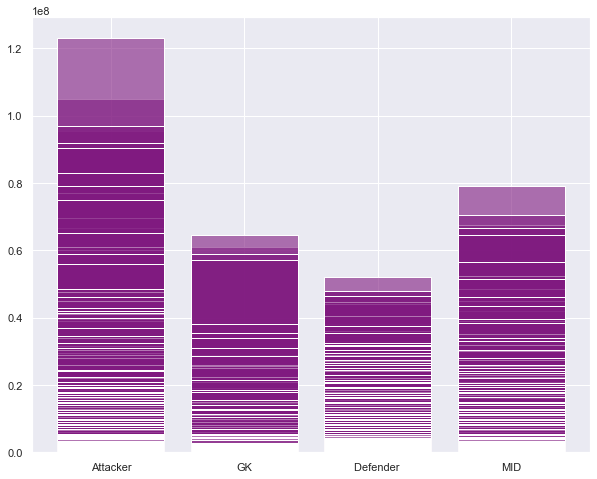

In [31]:
plt.bar(df.player_positions, df.value_eur, color = (0.5,0.1,0.5,0.6))
plt.show()

In [32]:
## As we can see Attackers are values higher comapred to other positions .

#### contract Valid

In [33]:
df.contract_valid_until.unique()

array([2021., 2018., 2022., 2019., 2020.,   nan, 2017., 2026., 2023.])

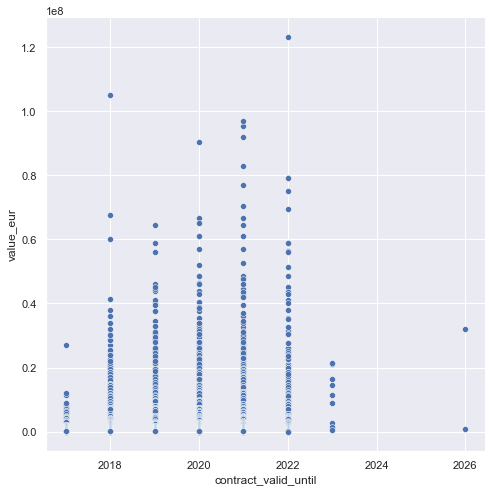

In [34]:
ax = sns.relplot(data=df, x="contract_valid_until", y="value_eur" ,height = 7  ,)

g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

In [35]:
### Contracts with less than 1 year have low value .

#### Skill moves 

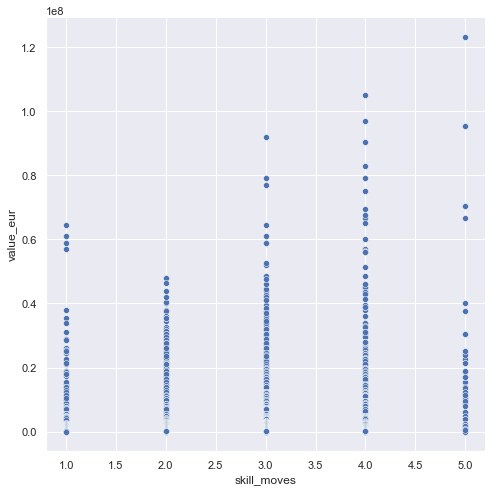

In [36]:
ax = sns.relplot(data=df, x="skill_moves", y="value_eur" ,height = 7  ,)

g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

### high value players have high skill moves value.

In [37]:
######PCA AND MODEL

In [38]:
data = df.replace(np.nan, 0)

In [39]:
data = data.drop(['player_url',
'short_name',
'long_name',
'team_jersey_number',
'loaned_from',
'joined',
'nation_position',
'nation_jersey_number',
 'dob',             
'body_type',
'real_face',
'preferred_foot',            
'player_tags',          
'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm'
,'rwb','lb','lcb','cb','rcb','rb'], axis = 1)
          
          
          

In [40]:
data.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_

In [41]:
dropcol=['gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic' ,'team_position','nationality','work_rate','club' ,'height_cm', 'weight_kg']

In [42]:
dats = data.drop(dropcol , axis=1 , )

In [43]:
dats.columns

Index(['sofifa_id', 'age', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'contract_valid_until'],
      dtype='object')

In [44]:
dats.dtypes

sofifa_id                     int64
age                           int64
overall                       int64
potential                     int64
value_eur                     int64
wage_eur                      int64
player_positions             object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
release_clause_eur          float64
contract_valid_until        float64
dtype: object

In [45]:
#### Converting Player position using one hot

In [46]:
dats = pd.get_dummies(dats, columns = ['player_positions'])

In [47]:
dats.head()

,sofifa_id,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,player_positions_Attacker,player_positions_Defender,player_positions_GK,player_positions_MID
0,20801,32,94,94,95500000,565000,5,4,5,195800000.0,2021.0,1,0,0,0
1,158023,30,93,93,105000000,565000,5,4,4,215300000.0,2018.0,1,0,0,0
2,190871,25,92,94,123000000,280000,5,5,5,236800000.0,2022.0,1,0,0,0
3,167495,31,92,92,61000000,230000,5,4,1,100700000.0,2021.0,0,0,1,0
4,176580,30,92,92,97000000,510000,5,4,4,198900000.0,2021.0,1,0,0,0


In [48]:
y = dats['value_eur']
dats.drop('value_eur' , axis=1 , inplace = True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dats, y, test_size=0.2 , random_state=43)

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.95953961, 0.06451613, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.96847631, 0.25806452, 0.45833333, ..., 1.        , 0.        ,
        0.        ],
       [0.96656012, 0.09677419, 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59774047, 0.74193548, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.96696747, 0.29032258, 0.4375    , ..., 1.        , 0.        ,
        0.        ],
       [0.98679031, 0.09677419, 0.29166667, ..., 0.        , 0.        ,
        0.        ]])

In [51]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.87500675, 0.16129032, 0.60416667, ..., 0.        , 1.        ,
        0.        ],
       [0.91766183, 0.12903226, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.96121888, 0.12903226, 0.35416667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.97557164, 0.19354839, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.82761731, 0.38709677, 0.45833333, ..., 0.        , 0.        ,
        0.        ],
       [0.652325  , 0.4516129 , 0.52083333, ..., 0.        , 0.        ,
        1.        ]])

In [52]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_minmax,y_train)

LinearRegression()

In [53]:
y_pred=regressor.predict(X_test_minmax)
y_pred
y_test
SQR_linearreg = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

array([8306688., 8855552.,  966656., ...,  770048., 1155072., 1892352.])

1600      7500000
1234     11500000
11857      625000
16880       50000
15272      270000
           ...   
13366      300000
900      10500000
11040      675000
7464       925000
4432      2200000
Name: value_eur, Length: 3519, dtype: int64

In [54]:
 R2_linearreg = r2_score(y_test, y_pred)

In [55]:
R2_linearreg

0.9710858598218741

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'linear_regression prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 5064.821979995777, 198944011.05897138)

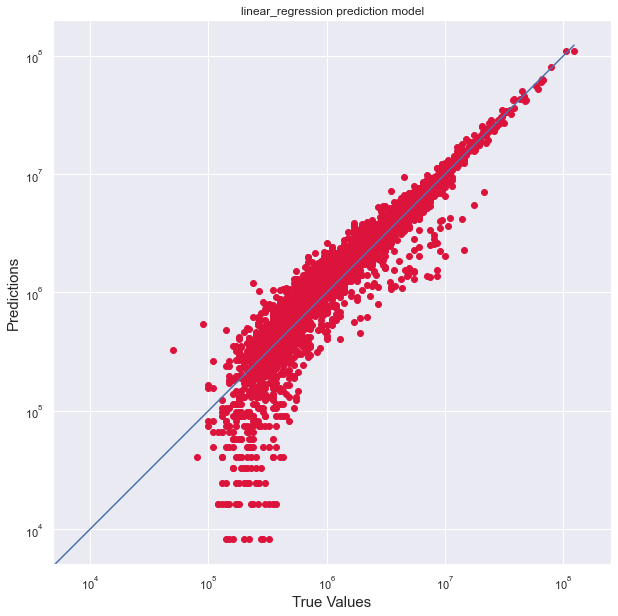

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('linear_regression prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Kflod 

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_minmax, y_train)

KNeighborsClassifier()

In [58]:
actual_y, predict_y = list(), list()
y_predict = model.predict(X_test_minmax)
actual_y.extend(y_test)
predict_y.extend(y_predict)

In [59]:
SQR_KF = np.sqrt(metrics.mean_squared_error(actual_y, predict_y))
R2_KF = r2_score(actual_y, predict_y)
R2_KF

0.8362437610211206

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'kfold prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

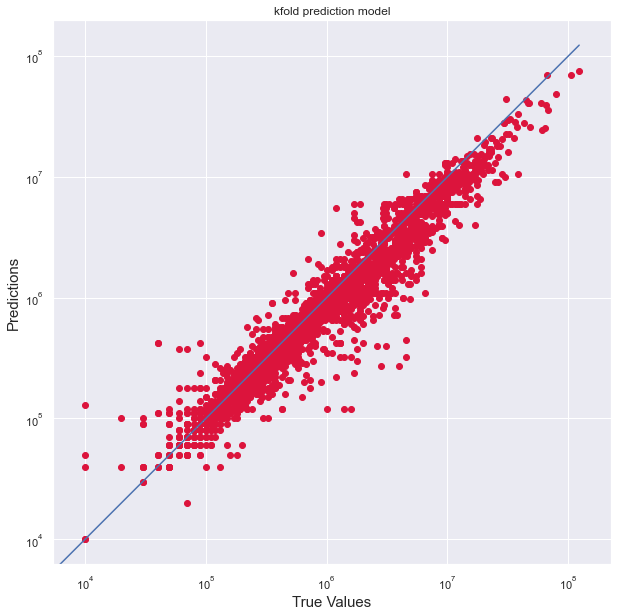

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(actual_y, predict_y, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict_y), max(actual_y))
p2 = min(min(predict_y), min(actual_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('kfold prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### SVC - C-Support Vector Classification.

In [61]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_minmax, y_train)
Y_pred2 = classifier.predict(X_test_minmax)

SVC(kernel='linear', random_state=0)

In [62]:
SQT_SVC = np.sqrt(metrics.mean_squared_error(y_test, Y_pred2))
R2_SVC = r2_score(y_test, Y_pred2)
R2_SVC

0.5793724072957127

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'SVC prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

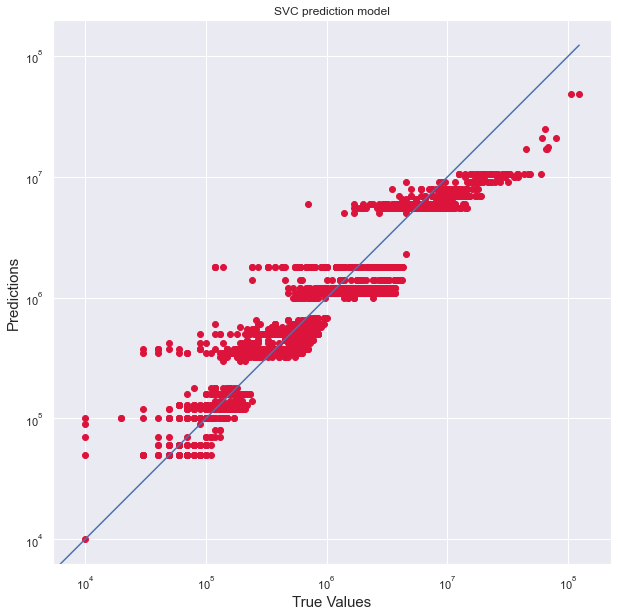

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred2), max(y_test))
p2 = min(min(Y_pred2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SVC prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 #### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_minmax, y_train)
Y_pred3 = classifier.predict(X_test_minmax)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [65]:
SQR_RFC = np.sqrt(metrics.mean_squared_error(y_test, Y_pred3))
R2_RFC = r2_score(y_test, Y_pred3)
R2_RFC

0.9127493286664992

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Random_Forest prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

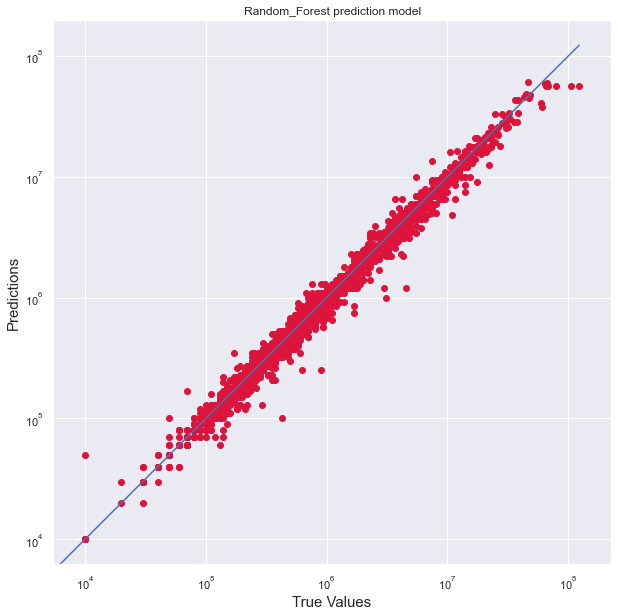

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred3), max(y_test))
p2 = min(min(Y_pred3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Random_Forest prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Decision Tree 

In [67]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier()

In [69]:
clf = clf.fit(X_train_minmax, y_train)
y_pred4 = clf.predict(X_test_minmax)

In [70]:
SQR_DT = np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
R2_DT = r2_score(y_test, y_pred4)
R2_DT

0.9712585865890289

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Decision_Tree prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

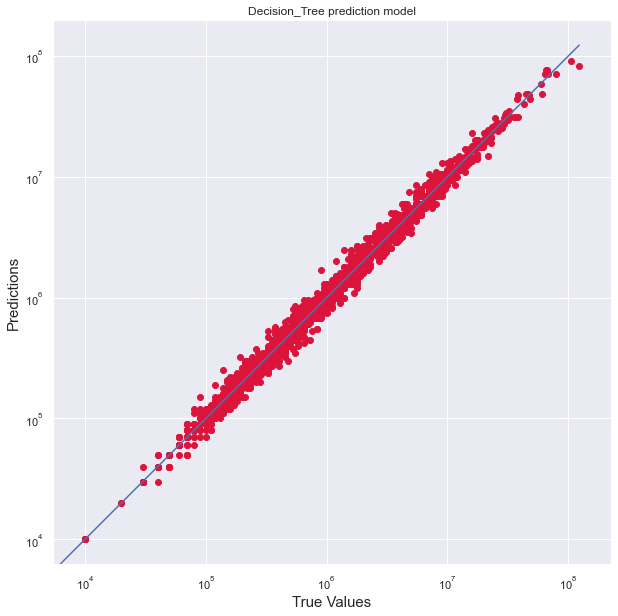

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred4), max(y_test))
p2 = min(min(y_pred4), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Decision_Tree prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 ## statistics of each model

In [72]:
header = ['Linear Regression' , 'Kfold' , 'SVC' ,'Random Forest' ,'Desicion Tree']
data = [np.log(SQR_linearreg) , np.log(SQR_KF), np.log(SQT_SVC) , np.log(SQR_RFC) ,np.log( SQR_DT)]
stat_analysis = pd.DataFrame(data = data , index = header )
stat_analysis.rename(columns = {0:'Square root'}, inplace = True)
stat_analysis['R2'] = [R2_linearreg , R2_KF ,R2_SVC , R2_RFC , R2_DT ]
stat_analysis

,Square root,R2
Linear Regression,13.803038,0.971086
Kfold,14.670062,0.836244
SVC,15.141746,0.579372
Random Forest,14.355265,0.912749
Desicion Tree,13.800042,0.971259
